In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Kaggle')
os.getcwd()
os.listdir()

['kaggle.json', 'images', 'meta', 'checkpoints', 'model_vgg19.h5']

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.6)
training_data = datagen.flow_from_directory('/content/drive/MyDrive/Kaggle/images',
                                        target_size= (224,224), seed = 42, batch_size = 50,
                                        shuffle = True, subset = "training")
test_data = datagen.flow_from_directory('/content/drive/MyDrive/Kaggle/images',
                                        target_size= (224,224), batch_size = 50,
                                        shuffle = True, seed = 42, subset = "validation")

Found 40400 images belonging to 101 classes.
Found 60600 images belonging to 101 classes.


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
base = VGG19(input_shape=(224,224,3), include_top=False, weights='imagenet')
base.trainable = False
model = Sequential()
model.add(base)
model.add(GlobalAveragePooling2D())
model.add(Dense(101, activation='softmax'))
model.compile(optimizer = Adam(learning_rate = 0.01),
                   loss = "categorical_crossentropy",
                   metrics=['accuracy'])

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath = '/content/drive/MyDrive/Kaggle/checkpoints', save_best_only = True, save_weights_only = True)
history = model.fit(training_data, epochs = 50, steps_per_epoch=700, callbacks= [checkpoint])

Epoch 1/50
700/700 [==============================] - 11794s 17s/step - loss: 3.7348 - accuracy: 0.1586
Epoch 2/50
700/700 [==============================] - 1697s 2s/step - loss: 3.1450 - accuracy: 0.2635
Epoch 3/50
700/700 [==============================] - 411s 586ms/step - loss: 2.9434 - accuracy: 0.2983
Epoch 4/50
700/700 [==============================] - 249s 355ms/step - loss: 2.8375 - accuracy: 0.3202
Epoch 5/50
700/700 [==============================] - 225s 322ms/step - loss: 2.7412 - accuracy: 0.3408
Epoch 6/50
700/700 [==============================] - 222s 317ms/step - loss: 2.6839 - accuracy: 0.3506
Epoch 7/50
700/700 [==============================] - 222s 317ms/step - loss: 2.6221 - accuracy: 0.3625
Epoch 8/50
700/700 [==============================] - 222s 317ms/step - loss: 2.5785 - accuracy: 0.3722
Epoch 9/50
700/700 [==============================] - 221s 316ms/step - loss: 2.5512 - accuracy: 0.3780
Epoch 10/50
700/700 [==============================] - 222s 316ms/

Text(0.5, 1.0, 'Training Accuracy')

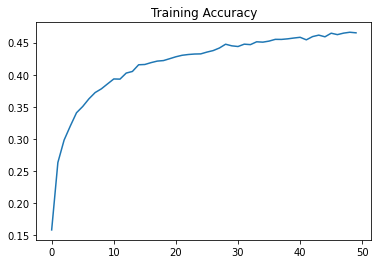

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.title('Training Accuracy')

Text(0.5, 1.0, 'Training Loss')

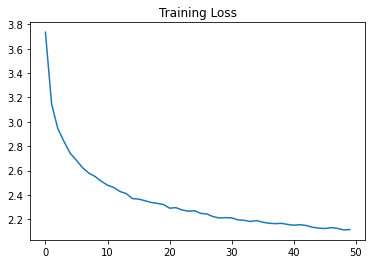

In [ ]:
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, loss)
plt.title('Training Loss')

In [ ]:
model.save('/content/drive/MyDrive/Kaggle/model_vgg19.h5')

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Kaggle/model_vgg19.h5')

In [ ]:
import numpy as np
def prediction(image,model = model): 
  image = tf.keras.preprocessing.image.load_img(image)
  image = image.convert('RGB')
  image = image.resize((224,224))
  image = np.asarray(image)/255
  image = tf.expand_dims(image, 0)
  prediction = model.predict(image)
  label_dict = training_data.class_indices
  label = list(label_dict.keys())[list(label_dict.values()).index(np.argmax(prediction))]
  return label

In [ ]:
prediction('/content/drive/MyDrive/Kaggle/images/chocolate_mousse/640.jpg')

'chocolate_mousse'